In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import json
import requests
import gmaps
import os
import sys

# Import API key
sys.path.insert(0, "/Users/ianmacmoore/Desktop/ClassHomework/keys")
from api_keys import g_key
gmaps.configure(api_key=g_key)
g_key

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

In [3]:
#Get main data from csv

#historyMN_df = pd.read_csv("../Output_Data/COV_Tracking_MN_History_data_20200422.csv")
#historyMN_df.head()

In [ ]:
historyMN_df['Date'] = historyMN_df['Date'].astype(str)
historyMN_df['Date'] = pd.to_datetime(historyMN_df['Date'],yearfirst=True)
historyMN_df.sort_values('Date',inplace=True)
historyMN_df


In [ ]:
#historyMN_df.reset_index(inplace = True)
#historyMN_df.dropna(how='any',inplace=True)
#historyMN_df
date_positive_df = historyMN_df.loc[:,['Date', 'Positive_Increase','Death_Increase','Total_Test_Results_Increase']]
date_positive_df.set_index('Date', inplace=True)
date_positive_df.dropna(inplace=True)
date_positive_df.head()


In [ ]:

date_positive_df.plot()
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.rc('font',family='Helvetica',size=10) # work in standard sans-serif
plt.rc('mathtext',fontset='stixsans')     # with math from www.stixfonts.org

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
plt.title("MN Daily Increase Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14, alpha=0.8)
plt.ylabel("People", fontsize=14, alpha=0.8)

#marker_style = dict(color='tab:blue', linestyle=':', marker='o',
#                    markersize=1, markerfacecoloralt='tab:red') **marker_style

# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
#plt.savefig("Output_Data/COV.png", bbox_inches="tight")  

In [ ]:
date_positive_df.rolling(5).std()

With it working for MN, bring in other States

In [10]:
statesToRead = ["MI","CO","MN"]
StateHistory_df = pd.DataFrame({})

state = "MN"

StateHistoryFile = "%s_%s.%s" % (f"Output_Data/COV_Tracking_{state}_History_data", _getToday() ,"csv")
StateHistory_df = pd.read_csv(StateHistoryFile)

StateHistory_df.head()

    

FileNotFoundError: [Errno 2] File Output_Data/COV_Tracking_MN_History_data_20200423.csv does not exist: 'Output_Data/COV_Tracking_MN_History_data_20200423.csv'

In [8]:
StateHistory_df['Date'] = StateHistory_df['Date'].astype(str)
StateHistory_df['Date'] = pd.to_datetime(StateHistory_df['Date'],yearfirst=True)
StateHistory_df.sort_values('Date',inplace=True)
StateHistory_df.dropna(how='any',inplace=True,subset=['Positive_Increase'])

StateHistory_df

,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
48,2020-03-06,CO,2,46,NaN,2020-03-06T21:00:00Z,NaN,NaN,48,0.0,0.0,27.0,2.0,29.0
47,2020-03-07,CO,8,55,NaN,2020-03-07T21:00:00Z,NaN,NaN,63,0.0,0.0,9.0,6.0,15.0
46,2020-03-08,CO,8,104,NaN,2020-03-08T20:00:00Z,NaN,NaN,112,0.0,0.0,49.0,0.0,49.0
45,2020-03-09,CO,9,133,NaN,2020-03-09T20:00:00Z,NaN,NaN,142,0.0,0.0,29.0,1.0,30.0
44,2020-03-10,CO,12,142,NaN,2020-03-10T20:00:00Z,NaN,NaN,154,0.0,0.0,9.0,3.0,12.0
43,2020-03-11,CO,28,251,NaN,2020-03-11T20:00:00Z,NaN,NaN,279,0.0,0.0,109.0,16.0,125.0
42,2020-03-12,CO,45,298,NaN,2020-03-12T20:00:00Z,NaN,NaN,343,0.0,0.0,47.0,17.0,64.0
41,2020-03-13,CO,72,524,NaN,2020-03-13T20:00:00Z,NaN,NaN,596,0.0,0.0,226.0,27.0,253.0
40,2020-03-14,CO,101,610,NaN,2020-03-14T20:00:00Z,1.0,NaN,711,1.0,0.0,86.0,29.0,115.0
39,2020-03-15,CO,131,627,NaN,2020-03-15T20:00:00Z,1.0,NaN,758,0.0,0.0,17.0,30.0,47.0


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


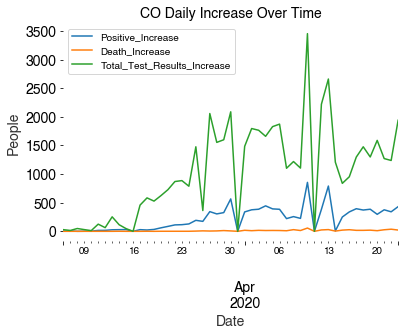

In [9]:
date_positive_df = StateHistory_df.loc[:,['Date', 'Positive_Increase','Death_Increase','Total_Test_Results_Increase']]
date_positive_df.set_index('Date', inplace=True)
date_positive_df.dropna(inplace=True)
date_positive_df.plot()
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.rc('font',family='Helvetica',size=10) # work in standard sans-serif
plt.rc('mathtext',fontset='stixsans')     # with math from www.stixfonts.org

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
plt.title(f"{state} Daily Increase Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14, alpha=0.8)
plt.ylabel("People", fontsize=14, alpha=0.8)
plt.show()